In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

import pickle
import json

<span style = "background-color:yellow;font-size : 20px;font-weight:bold">1.Problem statement : Heart Disease Data Analysis </span>

* where each row represents a patient. 

* Independent Feature : patients' clinical and demographic characteristics, which can be used to analyze and understand the   factors associated with heart disease.
 

* Dependent Feature : The "target" column indicates whether the patient has heart disease or not.

<span style = "background-color:yellow;font-size : 20px;font-weight:bold">2.Data gathering </span>

In [4]:
df = pd.read_csv(r"F:\Python\DataScience_ Projects\heart_disease_prediction_1\static\csv_files\heart.csv")
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<span style = "background-color:yellow;font-size : 20px;font-weight:bold">3.Data Preprocessing (EDA) </span>

* 3.1 Dataset does not contain any missing value.

* 3.2 As dataset Dtype is numerical there is no need to done encoding.

In [7]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<span style = "background-color:yellow;font-size : 20px;font-weight:bold">4.Feature Engineering </span>

* 4.1 Variance Inflation Factor (VIF):To assess multicollinearity

In [9]:
X = df.drop('target', axis=1)  # Exclude the target variable
X = sm.add_constant(X)  # Add constant term for VIF calculation

vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

   Variables         VIF
0      const  207.256646
1        age    1.443474
2     gender    1.161866
3         cp    1.284456
4   trestbps    1.170591
5       chol    1.150174
6        fbs    1.087379
7    restecg    1.060998
8    thalach    1.613726
9      exang    1.402001
10   oldpeak    1.705857
11     slope    1.642595
12        ca    1.202570
13      thal    1.147279


* 4.2 Correlation : 

correlation_matrix :Identification of risk factors: Correlation analysis can help identify the risk factors that are most strongly associated with heart disease

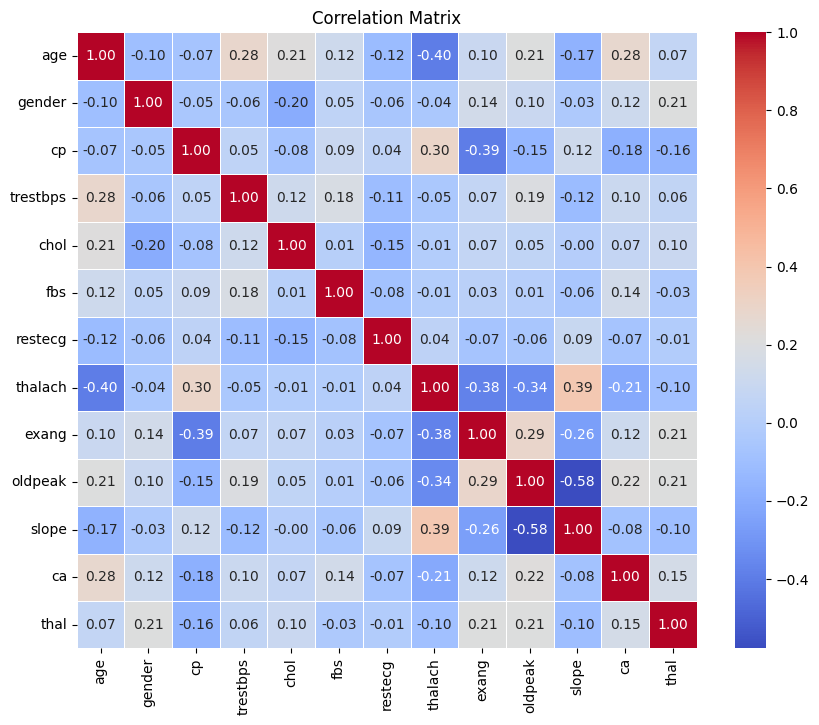

In [10]:
correlation_matrix = df.drop('target', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<span style = "background-color:yellow;font-size : 20px;font-weight:bold">5.Model Training  </span>

In [11]:
X = df.drop("target" ,axis=1)
y = df["target"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<span style = "background-color:yellow;font-size : 20px;font-weight:bold">6.Model evaluation  </span>

#### 6.1 Evaluation metrics for training dataset

In [14]:
y_train_pred = model.predict(X_train)

train_acc = accuracy_score(y_train, y_train_pred)
train_con = confusion_matrix(y_train, y_train_pred)
train_cla = classification_report(y_train, y_train_pred)

print("Training Dataset:")
print(f"Accuracy Score = {train_acc}")
print(f"Confusion Matrix = \n{train_con}")
print(f"Classification Report = \n{train_cla}")

Training Dataset:
Accuracy Score = 0.8679245283018868
Confusion Matrix = 
[[ 77  20]
 [  8 107]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        97
           1       0.84      0.93      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212



#### 6.2 Evaluation metrics for Testing dataset

In [15]:
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for testing dataset
test_acc = accuracy_score(y_test, y_test_pred)
test_con = confusion_matrix(y_test, y_test_pred)
test_cla = classification_report(y_test, y_test_pred)

# Print evaluation metrics for testing dataset
print("\nTesting Dataset:")
print(f"Accuracy Score = {test_acc}")
print(f"Confusion Matrix = \n{test_con}")
print(f"Classification Report = \n{test_cla}")


Testing Dataset:
Accuracy Score = 0.8241758241758241
Confusion Matrix = 
[[27 14]
 [ 2 48]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.93      0.66      0.77        41
           1       0.77      0.96      0.86        50

    accuracy                           0.82        91
   macro avg       0.85      0.81      0.81        91
weighted avg       0.84      0.82      0.82        91



### * 6.3 Evaluation metrics result for testing & training

#### Training Accuracy = 0.86 
#### Testing Accuracy = 0.82

### Low bais && Low Varience  >> Model fit correctly

<span style = "background-color:yellow;font-size : 20px;font-weight:bold">7.Test on a single row </span>

user_input = [[age, gender, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]

In [16]:
n_features = model.n_features_in_
print("Number of features:", n_features)

Number of features: 13


In [18]:
user_input = [[57 , 0 , 1 , 130 , 236 , 0 , 0 , 174 , 0 , 0.0 , 1 , 1 , 2 ]]

prediction = model.predict(user_input)

print("Prediction:", prediction)

print('*'*50)

if prediction == 0:
        print("No, You Don't have Heart Disease")
        
        
elif prediction == 1:
        print("Yes, You have Heart Disease")


Prediction: [1]
**************************************************
Yes, You have Heart Disease


### 8.pickle and json files

In [19]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [22]:
column = {"columns" : X.columns.to_list()}
print(column)

with open("columns.json","w") as file:
    json.dump(column,file)

{'columns': ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']}
